## 11.4 使用PyTorch实现人脸检测与识别
	前面我们介绍了人脸检测与识别的一些原理和方法，这节我们将使用PyTorch实现一个具体的人脸检测与识别的实例。数据集由两部分组成，一部分是别人的图像，一部分是自己的图像。

### 11.4.1 验证检测代码
	首先，我们查看原来的图像并浏览检测的大致效果。  
1）查看他人的图像及检测效果。

In [1]:
from PIL import Image
from face_dect_recong.align.detector import detect_faces
from face_dect_recong.align.visualization_utils import show_results
%matplotlib inline

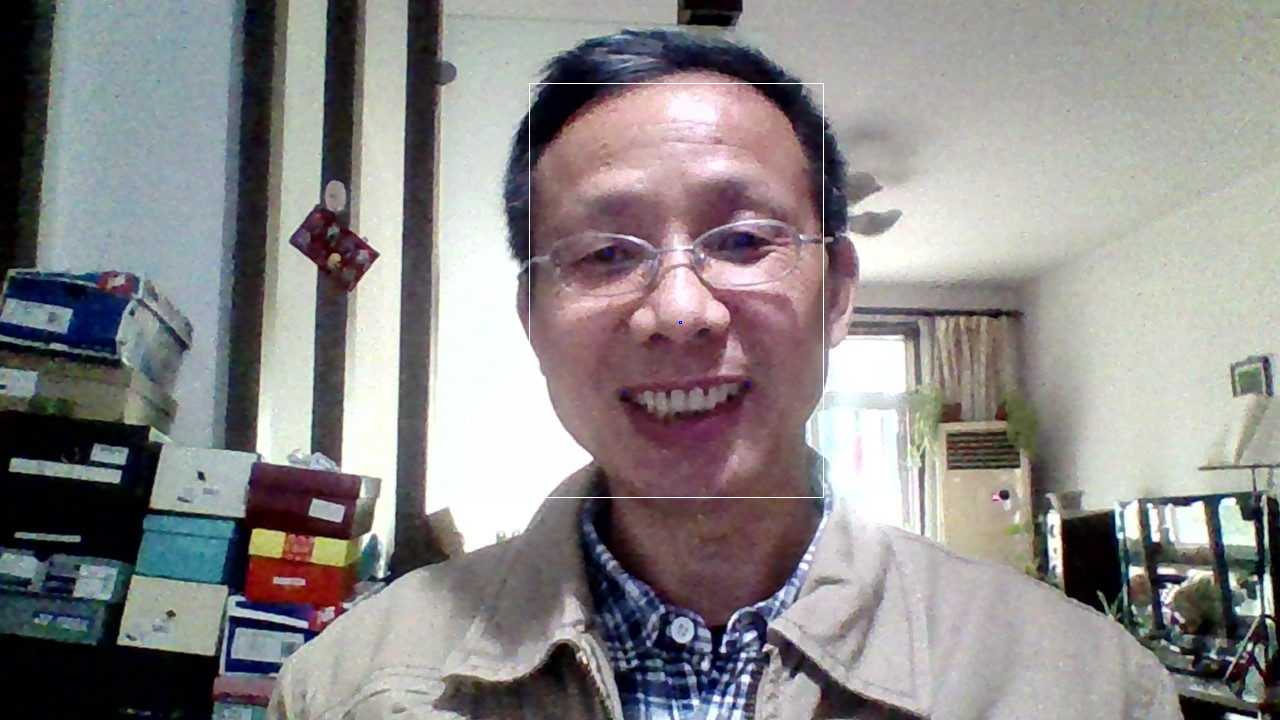

In [2]:
img = Image.open('../data/other_my_face/my/my/myf112.jpg') 
bounding_boxes, landmarks = detect_faces(img) # detect bboxes and landmarks for all faces in the image
show_results(img, bounding_boxes, landmarks) # visualize the results

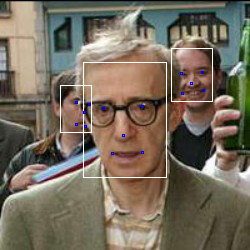

In [3]:
img = Image.open('../data/other_my_face/others/Woody_Allen/Woody_Allen_0001.jpg') 
bounding_boxes, landmarks = detect_faces(img) 
show_results(img, bounding_boxes, landmarks) 


In [4]:
#对其他人的图像进行检测
%run face_dect_recong/align/face_align.py -source_root "../data/other_my_face/others" -dest_root "../data/other_my_face_align/others" -crop_size 128

  0%|                                                                                           | 0/93 [00:00<?, ?it/s]

Processing	../data/other_my_face/others\Walid_Al-Awadi\Walid_Al-Awadi_0001.jpg
Processing	../data/other_my_face/others\Wallace_Capel\Wallace_Capel_0001.jpg


  2%|█▊                                                                                 | 2/93 [00:00<00:06, 13.75it/s]

Processing	../data/other_my_face/others\Wally_Szczerbiak\Wally_Szczerbiak_0001.jpg
Processing	../data/other_my_face/others\Walter_Annenberg\Walter_Annenberg_0001.jpg


  4%|███▌                                                                               | 4/93 [00:00<00:06, 13.36it/s]

Processing	../data/other_my_face/others\Walter_Mondale\Walter_Mondale_0001.jpg
Processing	../data/other_my_face/others\Walter_Mondale\Walter_Mondale_0002.jpg
Processing	../data/other_my_face/others\Walter_Mondale\Walter_Mondale_0003.jpg
Processing	../data/other_my_face/others\Walter_Mondale\Walter_Mondale_0004.jpg
Processing	../data/other_my_face/others\Walter_Mondale\Walter_Mondale_0005.jpg
Processing	../data/other_my_face/others\Walter_Mondale\Walter_Mondale_0006.jpg
Processing	../data/other_my_face/others\Walter_Mondale\Walter_Mondale_0007.jpg
Processing	../data/other_my_face/others\Walter_Mondale\Walter_Mondale_0008.jpg
Processing	../data/other_my_face/others\Walter_Mondale\Walter_Mondale_0009.jpg
Processing	../data/other_my_face/others\Walter_Mondale\Walter_Mondale_0010.jpg


  5%|████▍                                                                              | 5/93 [00:00<00:21,  4.00it/s]

Processing	../data/other_my_face/others\Walter_Woods\Walter_Woods_0001.jpg
Processing	../data/other_my_face/others\Walt_Harris\Walt_Harris_0001.jpg


  8%|██████▏                                                                            | 7/93 [00:01<00:16,  5.08it/s]

Processing	../data/other_my_face/others\Wanda_de_la_Jesus\Wanda_de_la_Jesus_0001.jpg
Processing	../data/other_my_face/others\Wanda_Ilene_Barzee\Wanda_Ilene_Barzee_0001.jpg


 10%|████████                                                                           | 9/93 [00:01<00:13,  6.40it/s]

Processing	../data/other_my_face/others\Wang_Fei\Wang_Fei_0001.jpg
Processing	../data/other_my_face/others\Wang_Hailan\Wang_Hailan_0001.jpg


 12%|█████████▋                                                                        | 11/93 [00:01<00:10,  7.73it/s]

Processing	../data/other_my_face/others\Wang_Nan\Wang_Nan_0001.jpg
Processing	../data/other_my_face/others\Wang_Yi\Wang_Yi_0001.jpg
Processing	../data/other_my_face/others\Wang_Yi\Wang_Yi_0002.jpg


 14%|███████████▍                                                                      | 13/93 [00:01<00:09,  8.14it/s]

Processing	../data/other_my_face/others\Wang_Yingfan\Wang_Yingfan_0001.jpg
Processing	../data/other_my_face/others\Wang_Yingfan\Wang_Yingfan_0002.jpg
Processing	../data/other_my_face/others\Wang_Yingfan\Wang_Yingfan_0003.jpg
Processing	../data/other_my_face/others\Wan_Yanhai\Wan_Yanhai_0001.jpg


 16%|█████████████▏                                                                    | 15/93 [00:01<00:10,  7.75it/s]

Processing	../data/other_my_face/others\Ward_Cuff\Ward_Cuff_0001.jpg
Processing	../data/other_my_face/others\Warren_Beatty\Warren_Beatty_0001.jpg
Processing	../data/other_my_face/others\Warren_Beatty\Warren_Beatty_0002.jpg


 18%|██████████████▉                                                                   | 17/93 [00:02<00:08,  8.61it/s]

Processing	../data/other_my_face/others\Warren_Buffett\Warren_Buffett_0001.jpg
Processing	../data/other_my_face/others\Warren_Buffett\Warren_Buffett_0002.jpg
Processing	../data/other_my_face/others\Warren_Buffett\Warren_Buffett_0003.jpg
Processing	../data/other_my_face/others\Warren_Granados\Warren_Granados_0001.jpg


 20%|████████████████▊                                                                 | 19/93 [00:02<00:09,  7.88it/s]

Processing	../data/other_my_face/others\Warren_Truss\Warren_Truss_0001.jpg
Processing	../data/other_my_face/others\Wayne_Allard\Wayne_Allard_0001.jpg


 23%|██████████████████▌                                                               | 21/93 [00:02<00:07,  9.09it/s]

Processing	../data/other_my_face/others\Wayne_Brady\Wayne_Brady_0001.jpg
Processing	../data/other_my_face/others\Wayne_Ferreira\Wayne_Ferreira_0001.jpg
Processing	../data/other_my_face/others\Wayne_Ferreira\Wayne_Ferreira_0002.jpg
Processing	../data/other_my_face/others\Wayne_Ferreira\Wayne_Ferreira_0003.jpg
Processing	../data/other_my_face/others\Wayne_Ferreira\Wayne_Ferreira_0004.jpg
Processing	../data/other_my_face/others\Wayne_Ferreira\Wayne_Ferreira_0005.jpg


 25%|████████████████████▎                                                             | 23/93 [00:02<00:10,  6.82it/s]

Processing	../data/other_my_face/others\Wayne_Gretzky\Wayne_Gretzky_0001.jpg
Processing	../data/other_my_face/others\Wayne_Gretzky\Wayne_Gretzky_0002.jpg
Processing	../data/other_my_face/others\Wayne_Gretzky\Wayne_Gretzky_0003.jpg
Processing	../data/other_my_face/others\Wayne_Gretzky\Wayne_Gretzky_0004.jpg


 26%|█████████████████████▏                                                            | 24/93 [00:03<00:13,  5.25it/s]

Processing	../data/other_my_face/others\Wayne_Newton\Wayne_Newton_0001.jpg
Processing	../data/other_my_face/others\Wei_Wu\Wei_Wu_0001.jpg


 28%|██████████████████████▉                                                           | 26/93 [00:03<00:10,  6.42it/s]

Processing	../data/other_my_face/others\Wendell_Bryant\Wendell_Bryant_0001.jpg
Processing	../data/other_my_face/others\Wendy_Kennedy\Wendy_Kennedy_0001.jpg


 30%|████████████████████████▋                                                         | 28/93 [00:03<00:08,  7.39it/s]

Processing	../data/other_my_face/others\Wendy_Selig\Wendy_Selig_0001.jpg
Processing	../data/other_my_face/others\Wen_Ho_Lee\Wen_Ho_Lee_0001.jpg


 32%|██████████████████████████▍                                                       | 30/93 [00:03<00:07,  8.40it/s]

Processing	../data/other_my_face/others\Wen_Jiabao\Wen_Jiabao_0001.jpg
Processing	../data/other_my_face/others\Wen_Jiabao\Wen_Jiabao_0002.jpg
Processing	../data/other_my_face/others\Wen_Jiabao\Wen_Jiabao_0003.jpg
Processing	../data/other_my_face/others\Wen_Jiabao\Wen_Jiabao_0004.jpg
Processing	../data/other_my_face/others\Wen_Jiabao\Wen_Jiabao_0005.jpg
Processing	../data/other_my_face/others\Wen_Jiabao\Wen_Jiabao_0006.jpg
Processing	../data/other_my_face/others\Wen_Jiabao\Wen_Jiabao_0007.jpg
Processing	../data/other_my_face/others\Wen_Jiabao\Wen_Jiabao_0008.jpg
Processing	../data/other_my_face/others\Wen_Jiabao\Wen_Jiabao_0009.jpg
Processing	../data/other_my_face/others\Wen_Jiabao\Wen_Jiabao_0010.jpg
Processing	../data/other_my_face/others\Wen_Jiabao\Wen_Jiabao_0011.jpg
Processing	../data/other_my_face/others\Wen_Jiabao\Wen_Jiabao_0012.jpg
Processing	../data/other_my_face/others\Wen_Jiabao\Wen_Jiabao_0013.jpg
Processing	../data/other_my_face/others\Werner_Schlager\Werner_Schlager_0001.

 34%|████████████████████████████▏                                                     | 32/93 [00:04<00:13,  4.44it/s]

Processing	../data/other_my_face/others\Wesley_Clark\Wesley_Clark_0001.jpg
Processing	../data/other_my_face/others\Wesley_Clark\Wesley_Clark_0002.jpg


 35%|█████████████████████████████                                                     | 33/93 [00:04<00:11,  5.15it/s]

Processing	../data/other_my_face/others\Wes_Craven\Wes_Craven_0001.jpg
Processing	../data/other_my_face/others\Whoopi_Goldberg\Whoopi_Goldberg_0001.jpg


 38%|██████████████████████████████▊                                                   | 35/93 [00:04<00:09,  6.17it/s]

Processing	../data/other_my_face/others\Wilbert_Elki_Meza_Majino\Wilbert_Elki_Meza_Majino_0001.jpg
Processing	../data/other_my_face/others\Wilbert_Foy\Wilbert_Foy_0001.jpg


 40%|████████████████████████████████▌                                                 | 37/93 [00:05<00:07,  7.39it/s]

Processing	../data/other_my_face/others\Wilfredo_Moreno\Wilfredo_Moreno_0001.jpg
Processing	../data/other_my_face/others\William_Bratton\William_Bratton_0001.jpg
Processing	../data/other_my_face/others\William_Bratton\William_Bratton_0002.jpg
Processing	../data/other_my_face/others\William_Bratton\William_Bratton_0003.jpg


 42%|██████████████████████████████████▍                                               | 39/93 [00:05<00:07,  7.40it/s]

Processing	../data/other_my_face/others\William_Bulger\William_Bulger_0001.jpg
Processing	../data/other_my_face/others\William_Bulger\William_Bulger_0002.jpg
Processing	../data/other_my_face/others\William_Bulger\William_Bulger_0003.jpg
Processing	../data/other_my_face/others\William_Bulger\William_Bulger_0004.jpg


 43%|███████████████████████████████████▎                                              | 40/93 [00:05<00:09,  5.81it/s]

Processing	../data/other_my_face/others\William_Burns\William_Burns_0001.jpg
Processing	../data/other_my_face/others\William_Burns\William_Burns_0002.jpg


 44%|████████████████████████████████████▏                                             | 41/93 [00:05<00:08,  6.25it/s]

Processing	../data/other_my_face/others\William_Cocksedge\William_Cocksedge_0001.jpg
Processing	../data/other_my_face/others\William_Delahunt\William_Delahunt_0001.jpg


 46%|█████████████████████████████████████▉                                            | 43/93 [00:05<00:06,  7.55it/s]

Processing	../data/other_my_face/others\William_Donaldson\William_Donaldson_0001.jpg
Processing	../data/other_my_face/others\William_Donaldson\William_Donaldson_0002.jpg
Processing	../data/other_my_face/others\William_Donaldson\William_Donaldson_0003.jpg
Processing	../data/other_my_face/others\William_Donaldson\William_Donaldson_0004.jpg
Processing	../data/other_my_face/others\William_Donaldson\William_Donaldson_0005.jpg
Processing	../data/other_my_face/others\William_Donaldson\William_Donaldson_0006.jpg
Processing	../data/other_my_face/others\William_Donaldson\William_Donaldson_0007.jpg


 47%|██████████████████████████████████████▊                                           | 44/93 [00:06<00:11,  4.26it/s]

Processing	../data/other_my_face/others\William_Ford_Jr\William_Ford_Jr_0001.jpg
Processing	../data/other_my_face/others\William_Ford_Jr\William_Ford_Jr_0002.jpg
Processing	../data/other_my_face/others\William_Ford_Jr\William_Ford_Jr_0003.jpg
Processing	../data/other_my_face/others\William_Ford_Jr\William_Ford_Jr_0004.jpg
Processing	../data/other_my_face/others\William_Ford_Jr\William_Ford_Jr_0005.jpg
Processing	../data/other_my_face/others\William_Ford_Jr\William_Ford_Jr_0006.jpg
Processing	../data/other_my_face/others\William_Ford_Jr\William_Ford_Jr_0007.jpg


 48%|███████████████████████████████████████▋                                          | 45/93 [00:06<00:14,  3.21it/s]

Processing	../data/other_my_face/others\William_Genego\William_Genego_0001.jpg
Processing	../data/other_my_face/others\William_Harrison\William_Harrison_0001.jpg


 51%|█████████████████████████████████████████▍                                        | 47/93 [00:07<00:11,  4.15it/s]

Processing	../data/other_my_face/others\William_Hochul\William_Hochul_0001.jpg
Processing	../data/other_my_face/others\William_Hochul\William_Hochul_0002.jpg


 52%|██████████████████████████████████████████▎                                       | 48/93 [00:07<00:09,  4.69it/s]

Processing	../data/other_my_face/others\William_Hurt\William_Hurt_0001.jpg
Processing	../data/other_my_face/others\William_Hyde\William_Hyde_0001.jpg


 54%|████████████████████████████████████████████                                      | 50/93 [00:07<00:07,  6.00it/s]

Processing	../data/other_my_face/others\William_Jackson\William_Jackson_0001.jpg
Processing	../data/other_my_face/others\William_Joppy\William_Joppy_0001.jpg


 56%|█████████████████████████████████████████████▊                                    | 52/93 [00:07<00:05,  7.05it/s]

Processing	../data/other_my_face/others\William_Macy\William_Macy_0001.jpg
Processing	../data/other_my_face/others\William_Macy\William_Macy_0002.jpg
Processing	../data/other_my_face/others\William_Macy\William_Macy_0003.jpg
Processing	../data/other_my_face/others\William_Macy\William_Macy_0004.jpg
Processing	../data/other_my_face/others\William_Macy\William_Macy_0005.jpg
Processing	../data/other_my_face/others\William_Martin\William_Martin_0001.jpg
Processing	../data/other_my_face/others\William_Martin\William_Martin_0002.jpg


 58%|███████████████████████████████████████████████▌                                  | 54/93 [00:07<00:06,  6.02it/s]

Processing	../data/other_my_face/others\William_McDonough\William_McDonough_0001.jpg
Processing	../data/other_my_face/others\William_Morrow\William_Morrow_0001.jpg


 60%|█████████████████████████████████████████████████▍                                | 56/93 [00:08<00:05,  7.21it/s]

Processing	../data/other_my_face/others\William_Murabito\William_Murabito_0001.jpg
Processing	../data/other_my_face/others\William_Nessen\William_Nessen_0001.jpg


 62%|███████████████████████████████████████████████████▏                              | 58/93 [00:08<00:04,  8.61it/s]

Processing	../data/other_my_face/others\William_Overlin\William_Overlin_0001.jpg
Processing	../data/other_my_face/others\William_Perry\William_Perry_0001.jpg


 65%|████████████████████████████████████████████████████▉                             | 60/93 [00:08<00:03, 10.13it/s]

Processing	../data/other_my_face/others\William_Pryor_Jr\William_Pryor_Jr_0001.jpg
Processing	../data/other_my_face/others\William_Ragland\William_Ragland_0001.jpg


 67%|██████████████████████████████████████████████████████▋                           | 62/93 [00:08<00:02, 10.82it/s]

Processing	../data/other_my_face/others\William_Rehnquist\William_Rehnquist_0001.jpg
Processing	../data/other_my_face/others\William_Rehnquist\William_Rehnquist_0002.jpg
Processing	../data/other_my_face/others\William_Rosenberg\William_Rosenberg_0001.jpg


 69%|████████████████████████████████████████████████████████▍                         | 64/93 [00:08<00:02, 10.68it/s]

Processing	../data/other_my_face/others\William_Shatner\William_Shatner_0001.jpg
Processing	../data/other_my_face/others\William_Swor\William_Swor_0001.jpg


 71%|██████████████████████████████████████████████████████████▏                       | 66/93 [00:08<00:02, 11.58it/s]

Processing	../data/other_my_face/others\William_Umbach\William_Umbach_0001.jpg
Processing	../data/other_my_face/others\William_Webster\William_Webster_0001.jpg


 73%|███████████████████████████████████████████████████████████▉                      | 68/93 [00:08<00:02, 12.46it/s]

Processing	../data/other_my_face/others\Willie_Nelson\Willie_Nelson_0001.jpg
Processing	../data/other_my_face/others\Willie_Wilson\Willie_Wilson_0001.jpg


 75%|█████████████████████████████████████████████████████████████▋                    | 70/93 [00:09<00:01, 12.98it/s]

Processing	../data/other_my_face/others\Willis_Roberts\Willis_Roberts_0001.jpg
Processing	../data/other_my_face/others\Will_Ferrell\Will_Ferrell_0001.jpg


 77%|███████████████████████████████████████████████████████████████▍                  | 72/93 [00:09<00:01, 13.07it/s]

Processing	../data/other_my_face/others\Will_Ofenheusle\Will_Ofenheusle_0001.jpg
Processing	../data/other_my_face/others\Will_Self\Will_Self_0001.jpg


 80%|█████████████████████████████████████████████████████████████████▏                | 74/93 [00:09<00:01, 13.31it/s]

Processing	../data/other_my_face/others\Will_Smith\Will_Smith_0001.jpg
Processing	../data/other_my_face/others\Will_Smith\Will_Smith_0002.jpg
Processing	../data/other_my_face/others\Will_Young\Will_Young_0001.jpg


 82%|███████████████████████████████████████████████████████████████████               | 76/93 [00:09<00:01, 12.55it/s]

Processing	../data/other_my_face/others\Wilma_McNabb\Wilma_McNabb_0001.jpg
Processing	../data/other_my_face/others\Wilson_Alvarez\Wilson_Alvarez_0001.jpg


 84%|████████████████████████████████████████████████████████████████████▊             | 78/93 [00:09<00:01, 12.25it/s]

Processing	../data/other_my_face/others\Wilton_Gregory\Wilton_Gregory_0001.jpg
Processing	../data/other_my_face/others\Wim_Duisenberg\Wim_Duisenberg_0001.jpg


 86%|██████████████████████████████████████████████████████████████████████▌           | 80/93 [00:09<00:01, 12.69it/s]

Processing	../data/other_my_face/others\Winona_Ryder\Winona_Ryder_0001.jpg
Processing	../data/other_my_face/others\Winona_Ryder\Winona_Ryder_0002.jpg
Processing	../data/other_my_face/others\Winona_Ryder\Winona_Ryder_0003.jpg
Processing	../data/other_my_face/others\Winona_Ryder\Winona_Ryder_0004.jpg
Processing	../data/other_my_face/others\Winona_Ryder\Winona_Ryder_0005.jpg
Processing	../data/other_my_face/others\Winona_Ryder\Winona_Ryder_0006.jpg
Processing	../data/other_my_face/others\Winona_Ryder\Winona_Ryder_0007.jpg
Processing	../data/other_my_face/others\Winona_Ryder\Winona_Ryder_0008.jpg
Processing	../data/other_my_face/others\Winona_Ryder\Winona_Ryder_0009.jpg
Processing	../data/other_my_face/others\Winona_Ryder\Winona_Ryder_0010.jpg
Processing	../data/other_my_face/others\Winona_Ryder\Winona_Ryder_0011.jpg
Processing	../data/other_my_face/others\Winona_Ryder\Winona_Ryder_0012.jpg
Processing	../data/other_my_face/others\Winona_Ryder\Winona_Ryder_0013.jpg
Processing	../data/other_

 88%|████████████████████████████████████████████████████████████████████████▎         | 82/93 [00:11<00:03,  3.22it/s]

Processing	../data/other_my_face/others\Win_Aung\Win_Aung_0001.jpg
Processing	../data/other_my_face/others\Win_Aung\Win_Aung_0002.jpg
Processing	../data/other_my_face/others\Win_Aung\Win_Aung_0003.jpg
Processing	../data/other_my_face/others\Win_Aung\Win_Aung_0004.jpg


 89%|█████████████████████████████████████████████████████████████████████████▏        | 83/93 [00:11<00:03,  3.33it/s]

Processing	../data/other_my_face/others\Wolfgang_Becker\Wolfgang_Becker_0001.jpg
Processing	../data/other_my_face/others\Wolfgang_Clement\Wolfgang_Clement_0001.jpg


 91%|██████████████████████████████████████████████████████████████████████████▉       | 85/93 [00:11<00:01,  4.34it/s]

Processing	../data/other_my_face/others\Wolfgang_Schneiderhan\Wolfgang_Schneiderhan_0001.jpg
Processing	../data/other_my_face/others\Wolfgang_Schuessel\Wolfgang_Schuessel_0001.jpg
Processing	../data/other_my_face/others\Wolfgang_Schuessel\Wolfgang_Schuessel_0002.jpg
Processing	../data/other_my_face/others\Wolfgang_Schuessel\Wolfgang_Schuessel_0003.jpg
Processing	../data/other_my_face/others\Wolfgang_Schuessel\Wolfgang_Schuessel_0004.jpg


 94%|████████████████████████████████████████████████████████████████████████████▋     | 87/93 [00:12<00:01,  4.76it/s]

Processing	../data/other_my_face/others\Wolfgang_Schwarz\Wolfgang_Schwarz_0001.jpg
Processing	../data/other_my_face/others\Woodrow_Stanley\Woodrow_Stanley_0001.jpg


 96%|██████████████████████████████████████████████████████████████████████████████▍   | 89/93 [00:12<00:00,  5.98it/s]

Processing	../data/other_my_face/others\Woody_Allen\Woody_Allen_0001.jpg
Processing	../data/other_my_face/others\Woody_Allen\Woody_Allen_0002.jpg
Processing	../data/other_my_face/others\Woody_Allen\Woody_Allen_0003.jpg
Processing	../data/other_my_face/others\Woody_Allen\Woody_Allen_0004.jpg
Processing	../data/other_my_face/others\Woody_Allen\Woody_Allen_0005.jpg
Processing	../data/other_my_face/others\Wu_Peng\Wu_Peng_0001.jpg


 98%|████████████████████████████████████████████████████████████████████████████████▏ | 91/93 [00:12<00:00,  5.52it/s]

Processing	../data/other_my_face/others\Wu_Yi\Wu_Yi_0001.jpg
Processing	../data/other_my_face/others\Wu_Yi\Wu_Yi_0002.jpg
Processing	../data/other_my_face/others\Wu_Yi\Wu_Yi_0003.jpg


 99%|█████████████████████████████████████████████████████████████████████████████████ | 92/93 [00:13<00:00,  5.09it/s]

Processing	../data/other_my_face/others\Wycliffe_Grousbeck\Wycliffe_Grousbeck_0001.jpg


100%|██████████████████████████████████████████████████████████████████████████████████| 93/93 [00:13<00:00,  7.08it/s]


In [5]:
#对我的图像进行检测
%run face_dect_recong/align/face_align.py -source_root "../data/other_my_face/my/" -dest_root "../data/other_my_face_align/others/" -crop_size 128

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

Processing	../data/other_my_face/my/my\myf112.jpg
Processing	../data/other_my_face/my/my\myf113.jpg
Processing	../data/other_my_face/my/my\myf114.jpg
Processing	../data/other_my_face/my/my\myf115.jpg
Processing	../data/other_my_face/my/my\myf116.jpg
Processing	../data/other_my_face/my/my\myf117.jpg
Processing	../data/other_my_face/my/my\myf118.jpg
Processing	../data/other_my_face/my/my\myf119.jpg
Processing	../data/other_my_face/my/my\myf120.jpg
Processing	../data/other_my_face/my/my\myf121.jpg
Processing	../data/other_my_face/my/my\myf122.jpg
Processing	../data/other_my_face/my/my\myf123.jpg
Processing	../data/other_my_face/my/my\myf124.jpg
Processing	../data/other_my_face/my/my\myf125.jpg
Processing	../data/other_my_face/my/my\myf126.jpg
Processing	../data/other_my_face/my/my\myf127.jpg
Processing	../data/other_my_face/my/my\myf128.jpg
Processing	../data/other_my_face/my/my\myf129.jpg
Processing	../data/other_my_face/my/my\myf131.jpg
Processing	../data/other_my_face/my/my\myf132.jpg


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [01:26<00:00, 86.38s/it]


In [6]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

<function matplotlib.pyplot.show(*args, **kw)>

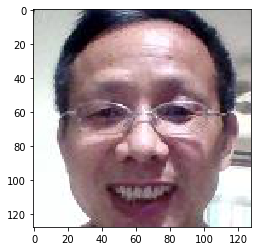

In [7]:
img=imread('../data/other_my_face_align/others/my/myf112.jpg')
plt.imshow(img)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

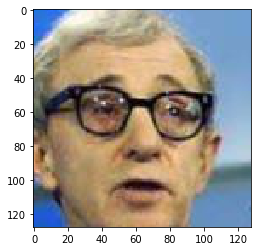

In [8]:
img=imread('../data/other_my_face_align/others/Woody_Allen/Woody_Allen_0002.jpg')
plt.imshow(img)
plt.show

In [9]:
#删除小于4张的一些人
%run face_dect_recong/balance/remove_lowshot.py  -root01  ../data/other_my_face_align/others/  -min_num 4

  0%|                                                                                           | 0/94 [00:00<?, ?it/s]

Class Walid_Al-Awadi has less than 4 samples, removed!
Class Wallace_Capel has less than 4 samples, removed!
Class Wally_Szczerbiak has less than 4 samples, removed!
Class Walter_Annenberg has less than 4 samples, removed!
Class Walter_Woods has less than 4 samples, removed!
Class Walt_Harris has less than 4 samples, removed!
Class Wanda_de_la_Jesus has less than 4 samples, removed!
Class Wanda_Ilene_Barzee has less than 4 samples, removed!
Class Wang_Fei has less than 4 samples, removed!
Class Wang_Hailan has less than 4 samples, removed!
Class Wang_Nan has less than 4 samples, removed!
Class Wang_Yi has less than 4 samples, removed!
Class Wang_Yingfan has less than 4 samples, removed!
Class Wan_Yanhai has less than 4 samples, removed!
Class Ward_Cuff has less than 4 samples, removed!
Class Warren_Beatty has less than 4 samples, removed!
Class Warren_Buffett has less than 4 samples, removed!
Class Warren_Granados has less than 4 samples, removed!
Class Warren_Truss has less than 4 sam

 68%|███████████████████████████████████████████████████████▏                         | 64/94 [00:00<00:00, 629.13it/s]

Class William_Rosenberg has less than 4 samples, removed!
Class William_Shatner has less than 4 samples, removed!
Class William_Swor has less than 4 samples, removed!
Class William_Umbach has less than 4 samples, removed!
Class William_Webster has less than 4 samples, removed!
Class Willie_Nelson has less than 4 samples, removed!
Class Willie_Wilson has less than 4 samples, removed!
Class Willis_Roberts has less than 4 samples, removed!
Class Will_Ferrell has less than 4 samples, removed!
Class Will_Ofenheusle has less than 4 samples, removed!
Class Will_Self has less than 4 samples, removed!
Class Will_Smith has less than 4 samples, removed!
Class Will_Young has less than 4 samples, removed!
Class Wilma_McNabb has less than 4 samples, removed!
Class Wilson_Alvarez has less than 4 samples, removed!
Class Wilton_Gregory has less than 4 samples, removed!
Class Wim_Duisenberg has less than 4 samples, removed!
Class Winston_Churchill has less than 4 samples, removed!
Class Win_Aung has les

100%|█████████████████████████████████████████████████████████████████████████████████| 94/94 [00:00<00:00, 621.03it/s]


<Figure size 432x288 with 0 Axes>

<function matplotlib.pyplot.show(*args, **kw)>

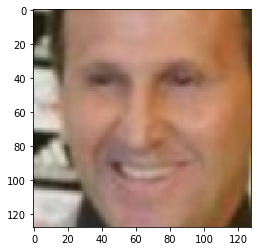

In [10]:
img=imread('../data/lfw/lfw-align-128/Zico/Zico_0001.jpg')
plt.imshow(img)
plt.show

In [11]:
class Config(object):
    env = 'default'
    backbone = 'resnet18'
    classify = 'softmax'
    
    metric = 'arc_margin'
    easy_margin = False
    #是否使用压缩奖惩网络模块（Squeeze-and-Excitation Blocks）
    use_se = False
    loss = 'focal_loss'

    display = False
    finetune = False

    
    #linux环境的路径设置
    #lfw_root = '/home/wumg/data/data/other_my_face_align/others'
    #windows环境的路径设置
    lfw_root = '../data/other_my_face_align/others'
    
    #linux环境的路径设置
    #lfw_test_list = '/home/wumg/data/data/other_my_face_align/others_test_pair.txt'
    #test_model_path = '/home/wumg/data/data/dataset/lfw/resnet18_110.pth'
    lfw_test_list = '../data/other_my_face_align/others_test_pair.txt'
    test_model_path = '../data/lfw/resnet18_110.pth'
    save_interval = 10

    train_batch_size = 16  # batch size
    test_batch_size = 60

    input_shape = (1, 128, 128)

    optimizer = 'sgd'

    use_gpu = True  # use GPU or not
    gpu_id = '0, 1'
    num_workers = 4  # how many workers for loading data
   
    max_epoch = 2
    lr = 1e-1  # initial learning rate
    lr_step = 10
    lr_decay = 0.95  # when val_loss increase, lr = lr*lr_decay
    weight_decay = 5e-4

In [12]:
from __future__ import print_function
import os
import cv2
import torch
import torch.nn as nn
import numpy as np
import time
from torch.nn import DataParallel
import torch.utils.model_zoo as model_zoo
import torch.nn.functional as F


In [13]:
model_urls = {
    'resnet18': 'https://download.pytorch.org/models/resnet18-5c106cde.pth',
    'resnet34': 'https://download.pytorch.org/models/resnet34-333f7ec4.pth'
    }

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


In [14]:
def conv3x3(in_planes, out_planes, stride=1):
    """3x3 convolution with padding"""
    return nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=stride,
                     padding=1, bias=False)


class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, inplanes, planes, stride=1, downsample=None):
        super(BasicBlock, self).__init__()
        self.conv1 = conv3x3(inplanes, planes, stride)
        self.bn1 = nn.BatchNorm2d(planes)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = conv3x3(planes, planes)
        self.bn2 = nn.BatchNorm2d(planes)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        residual = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        if self.downsample is not None:
            residual = self.downsample(x)

        out += residual
        out = self.relu(out)

        return out
    
class IRBlock(nn.Module):
    expansion = 1

    def __init__(self, inplanes, planes, stride=1, downsample=None, use_se=True):
        super(IRBlock, self).__init__()
        self.bn0 = nn.BatchNorm2d(inplanes)
        self.conv1 = conv3x3(inplanes, inplanes)
        self.bn1 = nn.BatchNorm2d(inplanes)
        self.prelu = nn.PReLU()
        self.conv2 = conv3x3(inplanes, planes, stride)
        self.bn2 = nn.BatchNorm2d(planes)
        self.downsample = downsample
        self.stride = stride
        self.use_se = use_se
        if self.use_se:
            self.se = SEBlock(planes)

    def forward(self, x):
        residual = x
        out = self.bn0(x)
        out = self.conv1(out)
        out = self.bn1(out)
        out = self.prelu(out)

        out = self.conv2(out)
        out = self.bn2(out)
        if self.use_se:
            out = self.se(out)

        if self.downsample is not None:
            residual = self.downsample(x)

        out += residual
        out = self.prelu(out)

        return out


class ResNetFace(nn.Module):
    def __init__(self, block, layers, use_se=True):
        self.inplanes = 64
        self.use_se = use_se
        super(ResNetFace, self).__init__()
        self.conv1 = nn.Conv2d(1, 64, kernel_size=3, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.prelu = nn.PReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.layer1 = self._make_layer(block, 64, layers[0])
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2)
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2)
        self.layer4 = self._make_layer(block, 512, layers[3], stride=2)
        self.bn4 = nn.BatchNorm2d(512)
        self.dropout = nn.Dropout()
        self.fc5 = nn.Linear(512 * 8 * 8, 512)
        self.bn5 = nn.BatchNorm1d(512)

        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.xavier_normal_(m.weight)
            elif isinstance(m, nn.BatchNorm2d) or isinstance(m, nn.BatchNorm1d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.xavier_normal_(m.weight)
                nn.init.constant_(m.bias, 0)

    def _make_layer(self, block, planes, blocks, stride=1):
        downsample = None
        if stride != 1 or self.inplanes != planes * block.expansion:
            downsample = nn.Sequential(
                nn.Conv2d(self.inplanes, planes * block.expansion,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(planes * block.expansion),
            )
        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample, use_se=self.use_se))
        self.inplanes = planes
        for i in range(1, blocks):
            layers.append(block(self.inplanes, planes, use_se=self.use_se))

        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.prelu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.bn4(x)
        x = self.dropout(x)
        x = x.view(x.size(0), -1)
        x = self.fc5(x)
        x = self.bn5(x)

        return x



class ResNet(nn.Module):

    def __init__(self, block, layers):
        self.inplanes = 64
        super(ResNet, self).__init__()
        # self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3,
        #                        bias=False)
        self.conv1 = nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=1,
                               bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        # self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.layer1 = self._make_layer(block, 64, layers[0], stride=2)
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2)
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2)
        self.layer4 = self._make_layer(block, 512, layers[3], stride=2)
        self.fc5 = nn.Linear(512 * 8 * 8, 512)

        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

    def _make_layer(self, block, planes, blocks, stride=1):
        downsample = None
        if stride != 1 or self.inplanes != planes * block.expansion:
            downsample = nn.Sequential(
                nn.Conv2d(self.inplanes, planes * block.expansion,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(planes * block.expansion),
            )

        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample))
        self.inplanes = planes * block.expansion
        for i in range(1, blocks):
            layers.append(block(self.inplanes, planes))

        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        # x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        # x = nn.AvgPool2d(kernel_size=x.size()[2:])(x)
        # x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc5(x)

        return x


def resnet18(pretrained=False, **kwargs):
    """Constructs a ResNet-18 model.
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
    """
    model = ResNet(BasicBlock, [2, 2, 2, 2], **kwargs)
    if pretrained:
        model.load_state_dict(model_zoo.load_url(model_urls['resnet18']))
    return model

def resnet_face18(use_se=True, **kwargs):
    model = ResNetFace(IRBlock, [2, 2, 2, 2], use_se=use_se, **kwargs)
    return model


In [15]:
def get_lfw_list(pair_list):
    with open(pair_list, 'r') as fd:
        pairs = fd.readlines()
    data_list = []
    for pair in pairs:
        splits = pair.split()

        if splits[0] not in data_list:
            data_list.append(splits[0])

        if splits[1] not in data_list:
            data_list.append(splits[1])
    return data_list


def load_image(img_path):
    image = cv2.imread(img_path, 0)
    if image is None:
        return None
    image = np.dstack((image, np.fliplr(image)))
    image = image.transpose((2, 0, 1))
    image = image[:, np.newaxis, :, :]
    image = image.astype(np.float32, copy=False)
    image -= 127.5
    image /= 127.5
    return image


def get_featurs(model, test_list, batch_size=10):
    images = None
    features = None
    cnt = 0
    for i, img_path in enumerate(test_list):
        image = load_image(img_path)
        if image is None:
            print('read {} error'.format(img_path))

        if images is None:
            images = image
        else:
            images = np.concatenate((images, image), axis=0)

        if images.shape[0] % batch_size == 0 or i == len(test_list) - 1:
            cnt += 1

            data = torch.from_numpy(images)
            data = data.to(device)
            output = model(data)
            output = output.data.cpu().numpy()

            fe_1 = output[::2]
            fe_2 = output[1::2]
            feature = np.hstack((fe_1, fe_2))
            # print(feature.shape)

            if features is None:
                features = feature
            else:
                features = np.vstack((features, feature))

            images = None

    return features, cnt


def load_model(model, model_path):
    model_dict = model.state_dict()
    pretrained_dict = torch.load(model_path)
    pretrained_dict = {k: v for k, v in pretrained_dict.items() if k in model_dict}
    model_dict.update(pretrained_dict)
    model.load_state_dict(model_dict)


def get_feature_dict(test_list, features):
    fe_dict = {}
    for i, each in enumerate(test_list):
        # key = each.split('/')[1]
        fe_dict[each] = features[i]
    return fe_dict


def cosin_metric(x1, x2):
    return np.dot(x1, x2) / (np.linalg.norm(x1) * np.linalg.norm(x2))


def cal_accuracy(y_score, y_true):
    y_score = np.asarray(y_score)
    y_true = np.asarray(y_true)
    best_acc = 0
    best_th = 0
    for i in range(len(y_score)):
        th = y_score[i]
        y_test = (y_score >= th)
        acc = np.mean((y_test == y_true).astype(int))
        if acc > best_acc:
            best_acc = acc
            best_th = th

    return (best_acc, best_th)


def test_performance(fe_dict, pair_list):
    with open(pair_list, 'r') as fd:
        pairs = fd.readlines()

    sims = []
    labels = []
    for pair in pairs:
        splits = pair.split()
        fe_1 = fe_dict[splits[0]]
        fe_2 = fe_dict[splits[1]]
        label = int(splits[2])
        sim = cosin_metric(fe_1, fe_2)

        sims.append(sim)
        labels.append(label)

    acc, th = cal_accuracy(sims, labels)
    return acc, th


def lfw_test(model, img_paths, identity_list, compair_list, batch_size):
    s = time.time()
    features, cnt = get_featurs(model, img_paths, batch_size=batch_size)
    #print(features.shape)
    t = time.time() - s
    #print('共用时间 {}, average time is {}'.format(t, t / cnt))
    fe_dict = get_feature_dict(identity_list, features)
    acc, th = test_performance(fe_dict, compair_list)
    print('准确率: ', acc, '阀值: ', th)
    return acc


In [16]:
opt = Config()
model = resnet_face18(opt.use_se)
#采用多GPU的数据并行处理机制
model = DataParallel(model)
#装载预训练模型
model.load_state_dict(torch.load(opt.test_model_path))
model.to(device)

identity_list = get_lfw_list(opt.lfw_test_list)
img_paths = [os.path.join(opt.lfw_root, each) for each in identity_list]

model.eval()
lfw_test(model, img_paths, identity_list, opt.lfw_test_list, opt.test_batch_size)
    

准确率:  1.0 阀值:  0.118202925


1.0

In [17]:
#img_path='/home/wumg/data/data/other_my_face_align/others/Wen_Jiabao/Wen_Jiabao_0002.jpg'
img_path='../data/other_my_face_align/others/my/myf241.jpg'
#img_path='/home/wumg/data/data/dataset/lfw/lfw-align-128/Wen_Jiabao/Wen_Jiabao_0002.jpg'
image = cv2.imread(img_path, 0)
if image is None:
    print("ok")

image = np.dstack((image, np.fliplr(image)))
image = image.transpose((2, 0, 1))
image = image[:, np.newaxis, :, :]
image = image.astype(np.float32, copy=False)
image -= 127.5
image /= 127.5

In [18]:
from __future__ import print_function
import os
import cv2
import torch
import numpy as np
import time
#from config import Config
from torch.nn import DataParallel


def get_lfw_list(pair_list):
    with open(pair_list, 'r') as fd:
        pairs = fd.readlines()
    data_list = []
    for pair in pairs:
        splits = pair.split()

        if splits[0] not in data_list:
            data_list.append(splits[0])

        if splits[1] not in data_list:
            data_list.append(splits[1])
    return data_list


def load_image(img_path):
    image = cv2.imread(img_path, 0)
    if image is None:
        return None
    image = np.dstack((image, np.fliplr(image)))
    image = image.transpose((2, 0, 1))
    image = image[:, np.newaxis, :, :]
    image = image.astype(np.float32, copy=False)
    image -= 127.5
    image /= 127.5
    return image


def get_featurs(model, test_list, batch_size=10):
    images = None
    features = None
    cnt = 0
    for i, img_path in enumerate(test_list):
        image = load_image(img_path)
        if image is None:
            print('read {} error'.format(img_path))

        if images is None:
            images = image
        else:
            images = np.concatenate((images, image), axis=0)

        if images.shape[0] % batch_size == 0 or i == len(test_list) - 1:
            cnt += 1

            data = torch.from_numpy(images)
            data = data.to(torch.device("cuda"))
            output = model(data)
            output = output.data.cpu().numpy()

            fe_1 = output[::2]
            fe_2 = output[1::2]
            feature = np.hstack((fe_1, fe_2))
            # print(feature.shape)

            if features is None:
                features = feature
            else:
                features = np.vstack((features, feature))

            images = None

    return features, cnt


def load_model(model, model_path):
    model_dict = model.state_dict()
    pretrained_dict = torch.load(model_path)
    pretrained_dict = {k: v for k, v in pretrained_dict.items() if k in model_dict}
    model_dict.update(pretrained_dict)
    model.load_state_dict(model_dict)


def get_feature_dict(test_list, features):
    fe_dict = {}
    for i, each in enumerate(test_list):
        # key = each.split('/')[1]
        fe_dict[each] = features[i]
    return fe_dict


def cosin_metric(x1, x2):
    return np.dot(x1, x2) / (np.linalg.norm(x1) * np.linalg.norm(x2))


def cal_accuracy(y_score, y_true):
    y_score = np.asarray(y_score)
    y_true = np.asarray(y_true)
    best_acc = 0
    best_th = 0
    for i in range(len(y_score)):
        th = y_score[i]
        y_test = (y_score >= th)
        acc = np.mean((y_test == y_true).astype(int))
        if acc > best_acc:
            best_acc = acc
            best_th = th

    return (best_acc, best_th)


def test_performance(fe_dict, pair_list):
    with open(pair_list, 'r') as fd:
        pairs = fd.readlines()

    sims = []
    labels = []
    for pair in pairs:
        splits = pair.split()
        fe_1 = fe_dict[splits[0]]
        fe_2 = fe_dict[splits[1]]
        label = int(splits[2])
        sim = cosin_metric(fe_1, fe_2)

        sims.append(sim)
        labels.append(label)

    acc, th = cal_accuracy(sims, labels)
    return acc, th


def lfw_test(model, img_paths, identity_list, compair_list, batch_size):
    s = time.time()
    features, cnt = get_featurs(model, img_paths, batch_size=batch_size)
    print(features.shape)
    t = time.time() - s
    print('total time is {}, average time is {}'.format(t, t / cnt))
    fe_dict = get_feature_dict(identity_list, features)
    acc, th = test_performance(fe_dict, compair_list)
    print('lfw face verification accuracy: ', acc, 'threshold: ', th)
    return acc


if __name__ == '__main__':

    opt = Config()
    if opt.backbone == 'resnet18':
        model = resnet_face18(opt.use_se)
    elif opt.backbone == 'resnet34':
        model = resnet34()
    elif opt.backbone == 'resnet50':
        model = resnet50()

    model = DataParallel(model)
    # load_model(model, opt.test_model_path)
    model.load_state_dict(torch.load(opt.test_model_path))
    model.to(torch.device("cuda"))

    identity_list = get_lfw_list(opt.lfw_test_list)
    img_paths = [os.path.join(opt.lfw_root, each) for each in identity_list]

    model.eval()
    lfw_test(model, img_paths, identity_list, opt.lfw_test_list, opt.test_batch_size)

(44, 1024)
total time is 0.42174768447875977, average time is 0.21087384223937988
lfw face verification accuracy:  1.0 threshold:  0.118202925
